In [4]:
from IPython.display import Image, display

# Prepare augmentations for both networks (0.5)

Implementacja augmentacji znajduje się w skrypcie `cct/src/tasks/gsn1/dataset.py`. Aby być pewnym co do tego, że augmentacje są poprawne, utworzyłem metodę `_display_dataset`. Zawiera one pętlę, która przegląda dataset próbka po próbce. W każdej iteracji pokazany jest oryginalny obraz oraz obraz po augmentacji, obydwa z odpowiednimi oznaczeniami. Jeśli dla danej próbki nie zastosowano augmentacji, to drugi obraz będzie w takiej sytuacji identyczny. Przykładowa wizualizacja jednej próbki znajduje się poniżej.

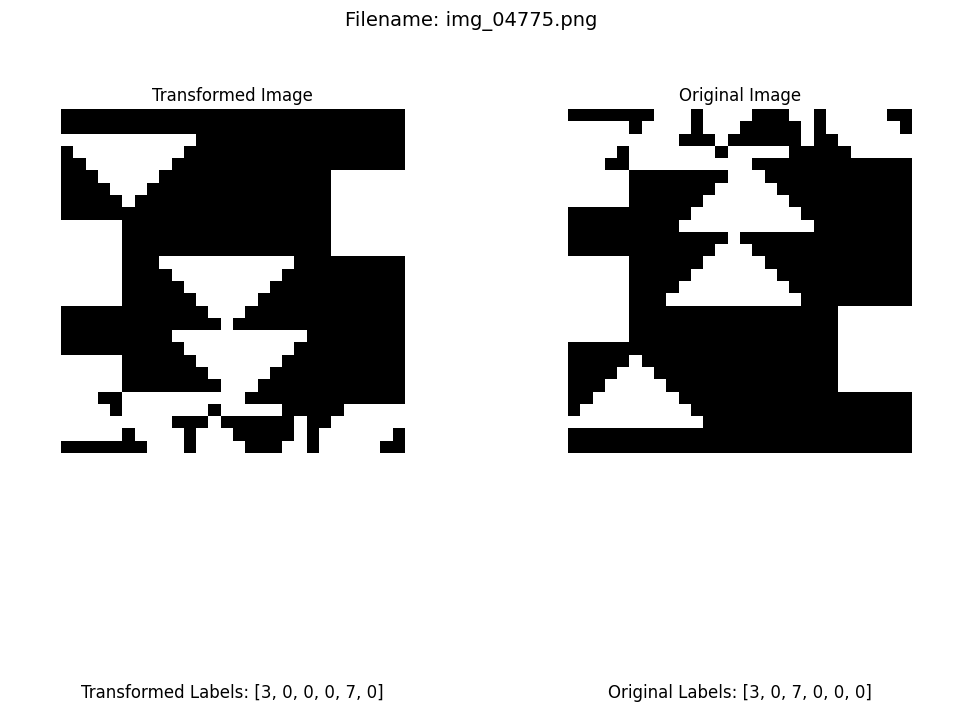

In [5]:
display(Image(filename="/home/admin2/Documents/repos/cct/notebooks/images/gsn1/augmentations.png"))

Nie zostało pokazane, jaka konkretnie augmentacja została zastosowana, gdyż nie to jest najważniejsze. Najważniejsze jest to, że obraz po augmentacji ma właściwe oznaczenie. Przeglądając obrazy w pętli możemy przekonać się, że kod dodkonujący augmentacji nie zawiera błędów.

# Prepare additional metrics (0.5)

# Prepare shape classification network (0.5) & figure counting network (0.5)

Mimo, że w tytule rodziału jest mowa o dwóch różnych sieciach w istocie różnica jest niewielka. Sieć jednego typu można przekształcić w sieć drugiego typu jedynie zmieniając liczbę ficzerów na wyjściu. Dlatego też obydwie sieci były generowane z tego samego kodu, który znajduje się poniżej.

In [8]:
!sed -n '45,127p' /home/admin2/Documents/repos/cct/src/tasks/gsn1/arch.py

class ShapeClassificationNet(nn.Module):
    def __init__(
            self,
            out_features: int,
            input_shape: List[int],
            n_conv_layers: int,
            n_channels_first_conv_layer: int,
            n_channels_last_conv_layer: int,
            maxpool_placing: str,
            pooling_method: str,
            n_fc_layers: int,
            fc_hidden_dim: int
    ):
        assert len(input_shape) == 3
        assert n_conv_layers >= 2
        assert maxpool_placing in ["first_conv", "even_convs", "none"]
        assert pooling_method in ["adaptive_avg", "fc"]

        super(ShapeClassificationNet, self).__init__()

        # Create conv block
        conv_block_scheme = _create_conv_block_scheme_from_params(
            n_conv_layers, n_channels_first_conv_layer,
            n_channels_last_conv_layer, maxpool_placing
        )
        self.conv_block = nn.ModuleList()
        for i, (in_channels, out_channels, add_maxpool) in enumerate(conv_block_sche

Inspirowałem się architekturami VGG oraz Resnet. Mimo, że powyższy kod pozwala na stworzenie bardzo wielu potencjalnych architektur, to pewne własności są w nim ustalone. Takimi własnościami są m.in.:
- ReLU po każdej warstwie konwolucyjnej i gęstej,
- batchnorm po każdej warstwie konwolucyjnej,
- dropout przed każdą warstwą gęstą. 

Zarówno VGG, jak i Resnet miały te cechy, więc zdecydowałem nie przeprowadzać eksperymentów w tej materii. Co podlegało za to eksperymentom to liczba warstw poszczególnych typów, liczba kanałów we warstwach, jak i sposób na połączenie części konwolucyjną z częścią gestą sieci. Sposób ten to albo użycie warstwy gęstej o bardzo wielu neuronach na wejściu (`pooling_method == "fc"`), albo poolowanie (`pooling_method == "adaptive_avg"`).